<a href="https://colab.research.google.com/github/virkhanna20/RESNET50/blob/main/ResNETFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Import Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
!kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [00:50<00:00, 38.6MB/s]
100% 1.96G/1.96G [00:50<00:00, 41.5MB/s]


In [4]:
from zipfile import ZipFile
file_name = "/content/100-bird-species.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
import os

# List contents of the data directory
data_dir = "/content"
print(os.listdir(data_dir))


['.config', 'train', 'birds.csv', 'valid', 'test', '100-bird-species.zip', 'EfficientNetB0-525-(224 X 224)- 98.97.h5', 'sample_data']


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the dataset path
data_dir = "/content"

# Update paths for the directories
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(180,180),
    batch_size=32,
    class_mode='categorical'
)


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [7]:
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")
print(f"Classes: {train_generator.class_indices}")

Number of training samples: 84635
Number of validation samples: 2625
Classes: {'ABBOTTS BABBLER': 0, 'ABBOTTS BOOBY': 1, 'ABYSSINIAN GROUND HORNBILL': 2, 'AFRICAN CROWNED CRANE': 3, 'AFRICAN EMERALD CUCKOO': 4, 'AFRICAN FIREFINCH': 5, 'AFRICAN OYSTER CATCHER': 6, 'AFRICAN PIED HORNBILL': 7, 'AFRICAN PYGMY GOOSE': 8, 'ALBATROSS': 9, 'ALBERTS TOWHEE': 10, 'ALEXANDRINE PARAKEET': 11, 'ALPINE CHOUGH': 12, 'ALTAMIRA YELLOWTHROAT': 13, 'AMERICAN AVOCET': 14, 'AMERICAN BITTERN': 15, 'AMERICAN COOT': 16, 'AMERICAN DIPPER': 17, 'AMERICAN FLAMINGO': 18, 'AMERICAN GOLDFINCH': 19, 'AMERICAN KESTREL': 20, 'AMERICAN PIPIT': 21, 'AMERICAN REDSTART': 22, 'AMERICAN ROBIN': 23, 'AMERICAN WIGEON': 24, 'AMETHYST WOODSTAR': 25, 'ANDEAN GOOSE': 26, 'ANDEAN LAPWING': 27, 'ANDEAN SISKIN': 28, 'ANHINGA': 29, 'ANIANIAU': 30, 'ANNAS HUMMINGBIRD': 31, 'ANTBIRD': 32, 'ANTILLEAN EUPHONIA': 33, 'APAPANE': 34, 'APOSTLEBIRD': 35, 'ARARIPE MANAKIN': 36, 'ASHY STORM PETREL': 37, 'ASHY THRUSHBIRD': 38, 'ASIAN CRESTED IBI

# Check a sample of the dataset

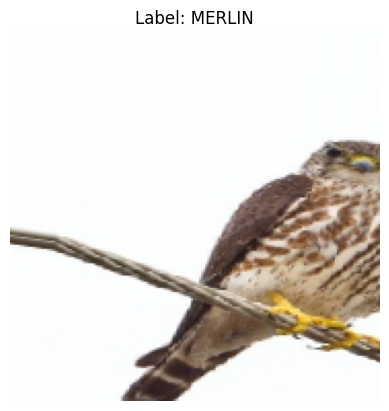

In [8]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Choose a random index
index = np.random.randint(0, len(images))

# Get the image and label
image = images[index]
label = labels[index]

# Decode the label (if needed)
class_names = list(train_generator.class_indices.keys())
label_index = np.argmax(label)
label_name = class_names[label_index]

# Plot the image
plt.imshow(image)
plt.title(f"Label: {label_name}")
plt.axis('off')
plt.show()


# Define Dataset Parameters

In [9]:
import tensorflow as tf

# Define the parameters
img_height, img_width = 180,180
batch_size = 32
data_dir = "/content"  # Adjust according to your data location

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(data_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(data_dir, 'valid'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

# Print class names
class_names = train_ds.class_names
print("Class Names:", class_names)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Class Names: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASI

0.0 1.0


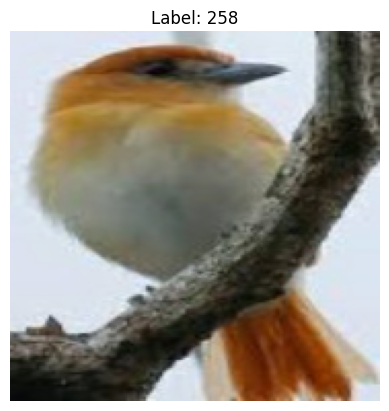

In [10]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize images to [0, 1]
    return image, label

# Apply preprocessing
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

# Verify normalization
for images, labels in train_ds.take(1):
    print(images[0].numpy().min(), images[0].numpy().max())  # Should print min=0.0, max=1.0
    plt.imshow(images[0].numpy())
    plt.title(f"Label: {labels[0]}")
    plt.axis('off')
    plt.show()

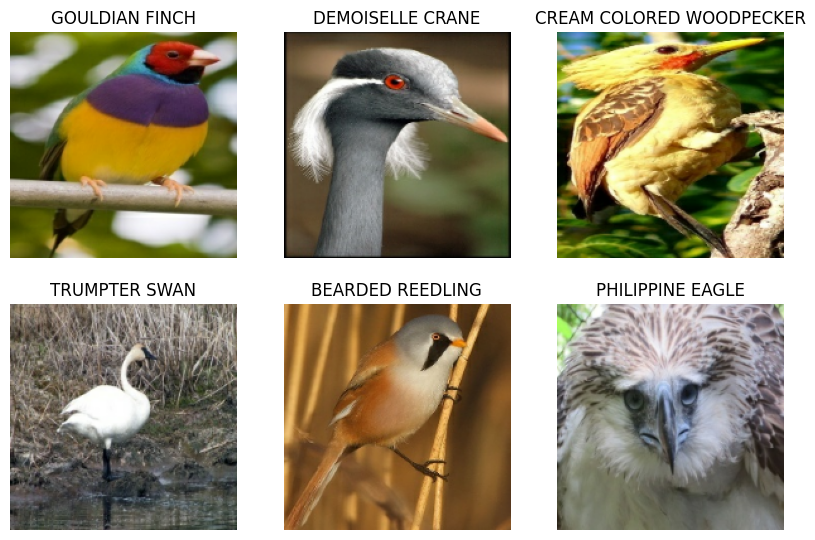

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot images and labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy() * 255.0  # Reverse normalization
        img = img.astype("uint8")  # Convert to uint8 for display
        plt.imshow(img)
        label_index = labels[i].numpy()  # Check label index directly
        plt.title(class_names[int(label_index)])
        plt.axis("off")
plt.show()



In [12]:
# Print label to class name mapping
for images, labels in train_ds.take(1):
    for i in range(len(labels)):
        print(f"Label: {labels[i].numpy()}, Class Name: {class_names[int(labels[i].numpy())]}")
    break

Label: 296, Class Name: IMPERIAL SHAQ
Label: 222, Class Name: FAIRY TERN
Label: 56, Class Name: BALTIMORE ORIOLE
Label: 229, Class Name: FLAME TANAGER
Label: 343, Class Name: MASKED BOBWHITE
Label: 45, Class Name: AUSTRALASIAN FIGBIRD
Label: 243, Class Name: GOLDEN EAGLE
Label: 509, Class Name: WHITE EARED HUMMINGBIRD
Label: 134, Class Name: CASPIAN TERN
Label: 517, Class Name: WOOD THRUSH
Label: 63, Class Name: BARN OWL
Label: 505, Class Name: WHITE BREASTED WATERHEN
Label: 23, Class Name: AMERICAN ROBIN
Label: 128, Class Name: CAPE LONGCLAW
Label: 418, Class Name: RED WISKERED BULBUL
Label: 444, Class Name: SCARLET MACAW
Label: 17, Class Name: AMERICAN DIPPER
Label: 232, Class Name: FRILL BACK PIGEON
Label: 320, Class Name: KIWI
Label: 432, Class Name: RUDY KINGFISHER
Label: 395, Class Name: PURPLE SWAMPHEN
Label: 70, Class Name: BEARDED REEDLING
Label: 75, Class Name: BLACK BREASTED PUFFBIRD
Label: 284, Class Name: HIMALAYAN MONAL
Label: 352, Class Name: NICOBAR PIGEON
Label: 10, Cl

In [13]:
# Load a small subset of the dataset
train_ds_small = train_ds.take(10)

# Inspect labels in this subset
for images, labels in train_ds_small:
    print("Labels:", labels.numpy())
    break

Labels: [255  54 101 471 457 247 410 330 184 437 161 199 296  79  75 492 517 102
 366 458 448 242 380 451 444 309  34 218 379 457 473 452]


# Model Training

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the parameters
img_height, img_width = 180, 180
batch_size = 32
epochs = 50
data_dir = "/content"  # Adjust according to your data location

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(data_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(data_dir, 'valid'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)


Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [15]:
# Define model
base_model = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top=False,
                                             input_shape=(img_height, img_width, 3))

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Load and summarize ResNet50 model

In [16]:
from tensorflow.keras.applications import ResNet50

# Load and summarize ResNet50 model
pretrained_model = ResNet50(include_top=False,
                            input_shape=(180, 180, 3),
                            weights='imagenet',
                            pooling='avg')

pretrained_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 90, 90, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 90, 90, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 45, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 45, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Define the new model and Compile

In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(include_top=False,
                      input_shape=(180, 180, 3),
                      weights='imagenet',
                      pooling='avg')

# Define the new model using the functional API
inputs = layers.Input(shape=(180, 180, 3))
x = base_model(inputs, training=False)  # Ensure base_model layers are not trainable
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)
resnet_model = models.Model(inputs, outputs)

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Print the model summary
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 525)                 │         269,325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,906,125 (95.01 MB)

 Trainable params: 24,853,005 (94.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# Define parameters
img_height, img_width = 180, 180
batch_size = 8
data_dir = "/content"

# Load datasets
def load_data(directory):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=directory,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        seed=123
    )
    return ds

# Load full datasets
train_ds_full = load_data(os.path.join(data_dir, 'train'))
val_ds_full = load_data(os.path.join(data_dir, 'valid'))

# Extract class names from the dataset
class_names = train_ds_full.class_names

# Increase dataset size slightly
train_ds = train_ds_full.take(1500)
val_ds = val_ds_full.take(750)

# Prepare datasets
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Define a simpler model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers
base_model.trainable = False

inputs = layers.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Use Global Average Pooling instead of Flatten
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Added Dense layer with regularization
x = layers.Dropout(0.5)(x)  # Added Dropout layer
outputs = layers.Dense(len(class_names), activation='softmax')(x)

simplified_model = models.Model(inputs, outputs)

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_loss',
                                    save_best_only=True,
                                    save_weights_only=False,
                                    mode='min',
                                    verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# Compile the model with a lower learning rate
simplified_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history = simplified_model.fit(train_ds,
                               validation_data=val_ds,
                               epochs=50,
                               callbacks=[model_checkpoint, early_stopping])


Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0137 - loss: 12.6076
Epoch 1: val_loss improved from inf to 7.68404, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.0137 - loss: 12.6065 - val_accuracy: 0.2019 - val_loss: 7.6840
Epoch 2/50
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1749 - loss: 6.9870
Epoch 2: val_loss improved from 7.68404 to 5.11567, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.1749 - loss: 6.9860 - val_accuracy: 0.4152 - val_loss: 5.1157
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3252 - loss: 4.9791
Epoch 3: val_loss improved from 5.11567 to 4.07045, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.3252 - loss: 4.9790 - val_accuracy: 0.5090 - val_loss: 4.0705
Epoch 4/50
1500/1500 ━━━━━━━━━

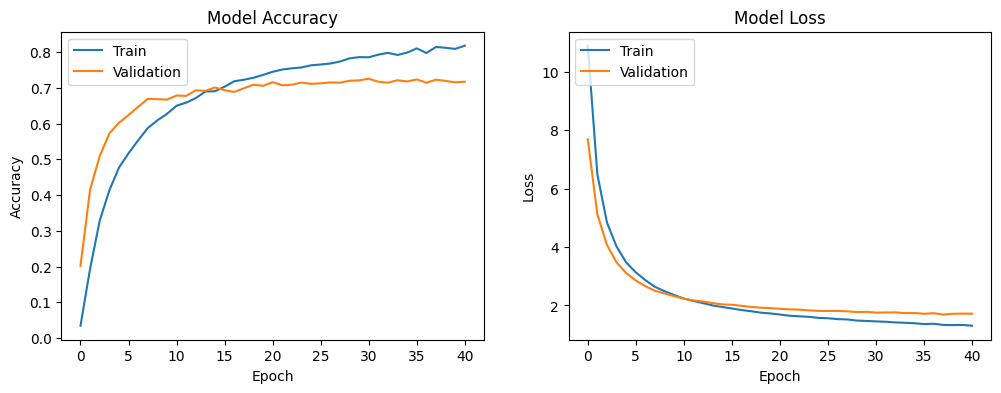

In [19]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [6]:
import tensorflow as tf

# Load the saved model
best_model = tf.keras.models.load_model('best_model.keras')

# Rename the model to 'simplified_model'
simplified_model = tf.keras.Model(inputs=best_model.input, outputs=best_model.output, name='simplified_model')

# Verify the renamed model architecture
simplified_model.summary()


Model: "simplified_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 525)                 │         269,325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,906,125 (95.01 MB)

 Trainable params: 1,318,413 (5.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 2625 files belonging to 525 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━

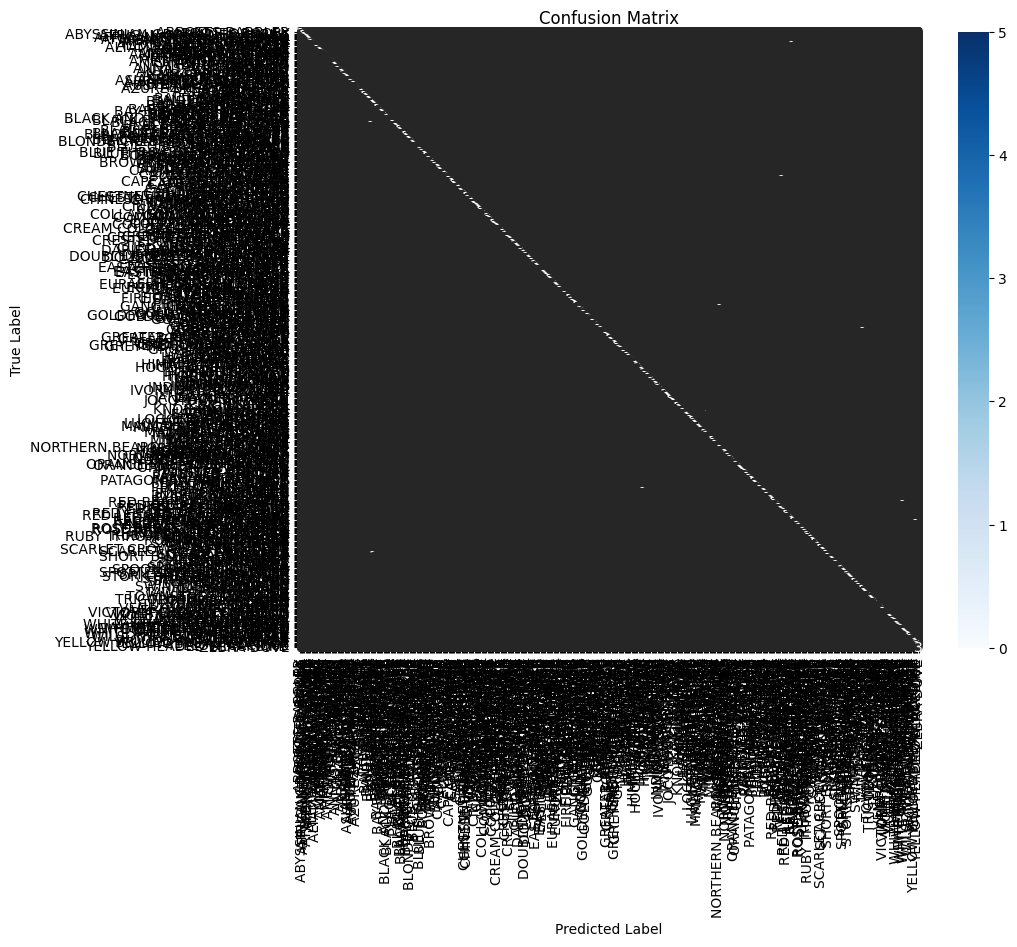

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.50      0.20      0.29         5
                ABBOTTS BOOBY       0.83      1.00      0.91         5
   ABYSSINIAN GROUND HORNBILL       0.80      0.80      0.80         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      0.60      0.75         5
            AFRICAN FIREFINCH       1.00      0.60      0.75         5
       AFRICAN OYSTER CATCHER       0.62      1.00      0.77         5
        AFRICAN PIED HORNBILL       0.75      0.60      0.67         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       0.75      0.60      0.67         5
               ALBERTS TOWHEE       1.00      0.60      0.75         5
         ALEXANDRINE PARAKEET       1.00      0.80      0.89         5
                ALPINE CHOUGH       1.00      0.20      0.33         5
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
# Load the datasets with a smaller batch size for inference
img_height, img_width = 180, 180
batch_size = 4  # Smaller batch size to reduce memory usage
data_dir = "/content"  # Adjust this according to your data location

def load_data(directory):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=directory,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        seed=123
    )
    return ds

# Load the validation dataset
val_ds = load_data(os.path.join(data_dir, 'valid'))

# Extract class names from the dataset
class_names = val_ds.class_names

# Prepare datasets with a smaller batch size
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Predict in smaller batches
all_labels = []
all_predictions = []

for images, labels in val_ds:
    predictions = np.argmax(simplified_model.predict(images), axis=-1)
    all_labels.extend(labels.numpy())
    all_predictions.extend(predictions)

# Convert lists to numpy arrays
val_labels = np.array(all_labels)
val_predictions = np.array(all_predictions)

# Create the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print(classification_report(val_labels, val_predictions, target_names=class_names))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━

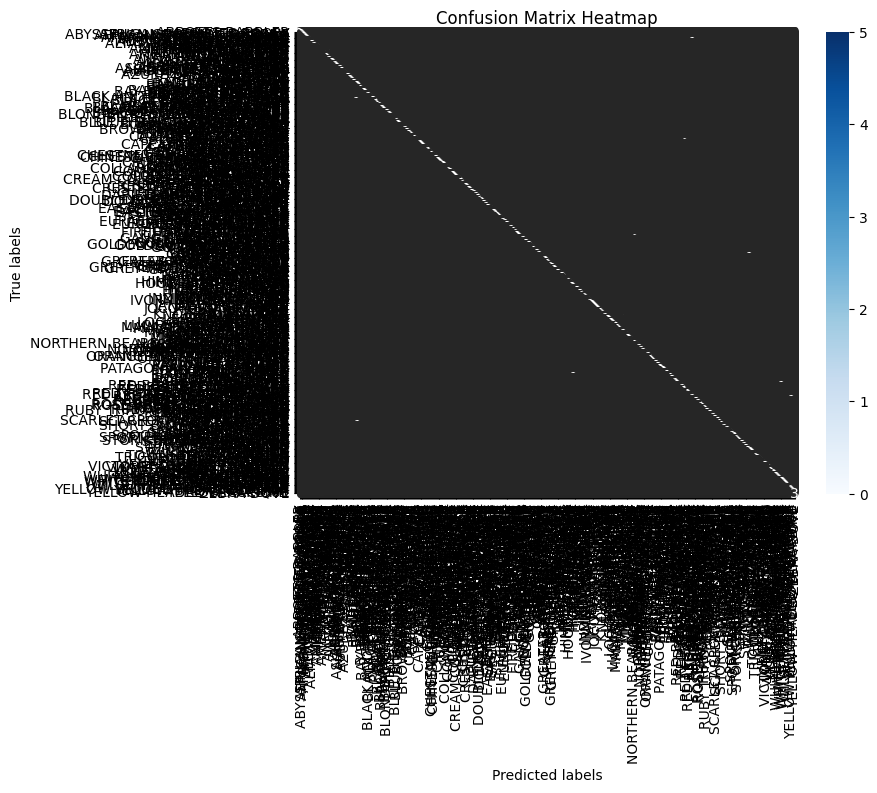

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume 'simplified_model' is your model and 'val_ds' is your validation dataset

# Get true labels and model predictions
true_labels = []
predictions = []

for images, labels in val_ds:
    true_labels.extend(labels.numpy())
    preds = simplified_model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))

true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [15]:
def load_data(directory):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=directory,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        seed=123
    )
    return ds

# Example directory
data_dir = "/content/train"  # Directory where the classes are organized
train_ds = load_data(data_dir)
class_names = train_ds.class_names


Found 84635 files belonging to 525 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define parameters
img_height, img_width = 180, 180
batch_size = 8

# Load datasets
def load_data(directory):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=directory,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        seed=123
    )
    return ds

# Example directory for class names
data_dir = "/content/train"  # Directory where the classes are organized
train_ds = load_data(data_dir)
class_names = train_ds.class_names

# Load the saved model
model_path = 'best_model.keras'  # Update this path if needed
model = tf.keras.models.load_model(model_path)





Found 84635 files belonging to 525 classes.


In [31]:
def predict_and_display(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

    # Predict
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])

    # Map index to class names
    predicted_class = class_names[class_index]

    # Display image and prediction
    plt.figure(figsize=(8, 6))

    # Load image using PIL for display
    img_pil = Image.open(img_path)

    plt.imshow(img_pil)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


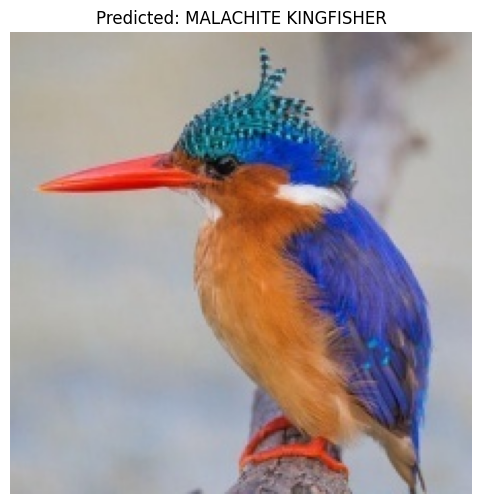

In [40]:
# Path to the test image
img_path = '/content/test/MALACHITE KINGFISHER/4.jpg'  # Update this path to the image you want to test

# Make prediction and display
predict_and_display(img_path, model)
